# General

First of all we need to import Pandas

In [2]:
import pandas as pd

Now we need to open the CSV

In [3]:
dataframe = pd.read_csv("mundo_transfermarkt_competicoes_brasileirao_serie_a.csv")

Now we need to filter the Corinthians games

In [15]:
corinthians_games_home = dataframe.loc[dataframe['time_mandante'] == 'Corinthians']
corinthians_games_away = dataframe.loc[dataframe['time_visitante'] == 'Corinthians']


corinthians_games_home_2024 = corinthians_games_home.loc[corinthians_games_home['ano_campeonato'] == 2024]
corinthians_games_away_2024 = corinthians_games_away.loc[corinthians_games_away['ano_campeonato'] == 2024] 

# https://www.datacamp.com/tutorial/joining-dataframes-pandas?utm_source=google&utm_medium=paid_search&utm_campaignid=21374847033&utm_adgroupid=165153430282&utm_device=c&utm_keyword=&utm_matchtype=&utm_network=g&utm_adpostion=&utm_creative=724847718217&utm_targetid=aud-1459190388940:dsa-2218886984100&utm_loc_interest_ms=&utm_loc_physical_ms=9207925&utm_content=&utm_campaign=240617_1-sea~dsa~tofu_2-b2c_3-ptbr-lang-en_4-prc_5-na_6-na_7-le_8-pdsh-go_9-nb-e_10-na_11-na-dec24&gad_source=1&gclid=CjwKCAiA34S7BhAtEiwACZzv4fSpntvszYD6JQYNsMBz--gqUOPffucSB3Hm6nJgu-z4XAReFe75FBoCjbAQAvD_BwE
corinthians_games_2024 = pd.merge(corinthians_games_home_2024, corinthians_games_away_2024, on='rodada', how='outer')

#print(corinthians_games_home_2024.shape)
print(corinthians_games_away_2024)
print(corinthians_games_2024)

      ano_campeonato        data  rodada  \
5709            2024  2024-07-07      15   
5714            2024  2024-07-21      18   
5763            2024  2024-07-29      20   
5773            2024  2024-07-11      16   
5792            2024  2024-07-02      13   
5804            2024  2024-06-12       8   
5829            2024  2024-09-15      26   
5835            2024  2024-05-11       6   
5895            2024  2024-08-25      24   
5896            2024  2024-04-18       2   
5902            2024  2024-09-29      28   
5938            2024  2024-08-18      23   
5954            2024  2024-04-20       3   

                                          estadio                    arbitro  \
5709           Estádio Governador Magalhães Pinto         Alex Gomes Stefano   
5714                             Arena Fonte Nova           Felipe Fernandes   
5763                                    Arena MRV      Bruno Arleu de Araújo   
5773                         Estádio São Januário       Rafael 

Ok, it seems that we already filtered the right matches. Now we need to sort the data.

       0
0   13.0
1   17.0
2   18.0
3   15.0
4   15.0
5   16.0
6   17.0
7   16.0
8   17.0
9   18.0
10  19.0
11  17.0
12  17.0
13  17.0
14  17.0
15  16.0
16  15.0
17  16.0
18  18.0
19  18.0
20  18.0
21  18.0
22  17.0
23  18.0
24  18.0
25  18.0


<AxesSubplot:>

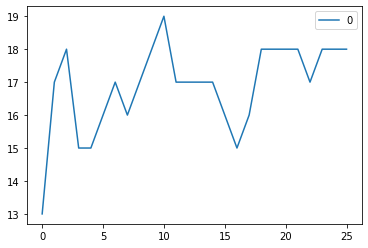

In [38]:
#print(corinthians_games_2024)
corinthians_games_2024 = corinthians_games_2024.sort_values('rodada')

# Ok, test.csv is not exactly what we want, but works...
corinthians_games_2024.to_csv("test.csv")

positions_per_round = []

for index, row in corinthians_games_2024.iterrows():
    if row['time_mandante_x'] == 'Corinthians':
        positions_per_round.append(row['colocacao_mandante_x'])
    else:
        positions_per_round.append(row['colocacao_visitante_y'])

corinthians_positions_2024 = pd.DataFrame(positions_per_round)

# Well, positions for the rounds 10 and 11 is lacking, but ok...
print(corinthians_positions_2024)
    
corinthians_positions_2024.plot.line()
